In [128]:
import numpy as np
import astropy.io.fits as pyfits
import matplotlib.pyplot as plt

In [129]:
target = "NGC2992"
data_dir = "/Users/dkakkad/work/research_projects/BASS/muse_cubes/"

In [130]:
def wl_cube_muse(fits_cube):
    cube = pyfits.open(fits_cube)
    crpix = cube[1].header["CRPIX3"]
    crval = cube[1].header["CRVAL3"]
    cdel  = cube[1].header["CD3_3"]
    num = cube[1].header["NAXIS3"]
    wl = (np.linspace(1,num,num) - crpix)*cdel + crval
    return wl

In [131]:
def aper_circ(img_data, x0, y0, R):
    Ny,Nx = np.shape(img_data)
    x,y = np.arange(Nx),np.arange(Ny)
    xgrid, ygrid = np.meshgrid(x,y)
    rgrid = ((xgrid-x0)**2+(ygrid-y0)**2)**0.5
    w = np.where(rgrid < R)
    flux = np.sum(img_data[w])#.sum()
    return flux

In [132]:
targ_cube = pyfits.open(data_dir+target+".fits")
wl = wl_cube_muse(data_dir+target+".fits")

sci_data = targ_cube[1].data
Nz,Ny,Nx = np.shape(sci_data)

In [137]:
# One photometric band at 7200 with width 500 A

cenwave = 6000
filt_wl = np.where((wl>cenwave-250)&(wl<cenwave+250))

filt_img = [[np.mean(sci_data[:,j,i][filt_wl]) for j in range(0,Ny)] for i in range(0,Nx)]
filt_img = np.array(filt_img)
filt_img[np.isnan(filt_img)] = 0

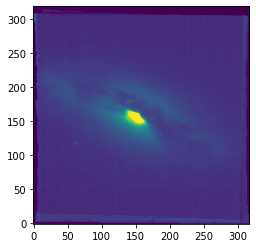

In [138]:
plt.imshow(filt_img, origin='lower',vmin=0,vmax=1000)
y0,x0 = np.where(filt_img == np.max(filt_img))

In [139]:
f_lambda = aper_circ(filt_img,x0[0],y0[0],int(15/0.2))*1.0e-20 # erg/s/cm2/A

# erg/s/cm2/Hz; formula from https://hea-www.harvard.edu/~pgreen/figs/Conversions.pdf
f_nu = 3.34e-19*cenwave*cenwave*f_lambda # erg/s/cm2/Hz
f_nu_Jy = f_nu*1.0e+23 # Jy
f_nu_Jy*1000 # mJy

54.963988560000004